In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.core.pylabtools import figsize

import seaborn; seaborn.set()
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from fig_code.figures import *

# use seaborn plotting defaults
import seaborn as sns; sns.set()

figsize(14, 7)

In [4]:
# Reading all csv files in the directory
import os
directory = "/Users/amad/Desktop/data 2/Audio"

for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        print(os.path.join(root, subdirectory))
    for file in files:
        print(os.path.join(root, file))

/Users/amad/Desktop/data 2/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton
/Users/amad/Desktop/data 2/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio
/Users/amad/Desktop/data 2/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki
/Users/amad/Desktop/data 2/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header
/Users/amad/Desktop/data 2/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah
/Users/amad/Desktop/data 2/Audio/michael mungaray - Michael_Mungaray
/Users/amad/Desktop/data 2/Audio/Tom Truong - Thomas_Truong_Updated
/Users/amad/Desktop/data 2/Audio/Aka'sh Carver - Akasha_Carver
/Users/amad/Desktop/data 2/Audio/Connor Contursi - Connor Contursi
/Users/amad/Desktop/data 2/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger
/Users/amad/Desktop/data 2/Audio/anthony mesa - Anthony Mesa
/Users/amad/Desktop/data 2/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI_CHUNDRU1
/Users/amad/Desktop/data 2/Audio/Carlos Ruiz - Carlos Ruiz -

In [15]:
# Reading stop data csv files from a folder
import os
from glob import glob
PATH = "/Users/amad/Desktop/data 2/Audio"
EXT = "*stop.csv"
stop = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
stop

['/Users/amad/Desktop/data 2/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/michael mungaray - Michael_Mungaray/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Tom Truong - Thomas_Truong_Updated/stop.csv',
 "/Users/amad/Desktop/data 2/Audio/Aka'sh Carver - Akasha_Carver/audio_stop.csv",
 '/Users/amad/Desktop/data 2/Audio/Connor Contursi - Connor Contursi/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/anthony mesa - Anthony Mesa/stop.csv',
 

In [16]:
# Reading go csv files
import os
from glob import glob
PATH = "/Users/amad/Desktop/data 2/Audio"
EXT = "*go.csv"
go = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
go

['/Users/amad/Desktop/data 2/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/go.csv',
 '/Users/amad/Desktop/data 2/Audio/michael mungaray - Michael_Mungaray/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Tom Truong - Thomas_Truong_Updated/go.csv',
 "/Users/amad/Desktop/data 2/Audio/Aka'sh Carver - Akasha_Carver/audio_go.csv",
 '/Users/amad/Desktop/data 2/Audio/Connor Contursi - Connor Contursi/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/go.csv',
 '/Users/amad/Desktop/data 2/Audio/anthony mesa - Anthony Mesa/go.csv',
 '/Users/amad/Desktop/d

In [17]:
# Reading up csv files
import os
from glob import glob
PATH = "/Users/amad/Desktop/data 2/Audio"
EXT = "*up.csv"
up = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
up

['/Users/amad/Desktop/data 2/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/up.csv',
 '/Users/amad/Desktop/data 2/Audio/michael mungaray - Michael_Mungaray/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Tom Truong - Thomas_Truong_Updated/up.csv',
 "/Users/amad/Desktop/data 2/Audio/Aka'sh Carver - Akasha_Carver/up.csv",
 '/Users/amad/Desktop/data 2/Audio/Connor Contursi - Connor Contursi/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/up.csv',
 '/Users/amad/Desktop/data 2/Audio/anthony mesa - Anthony Mesa/up.csv',
 '/Users/amad/Desktop/data 2/

In [18]:
# Reading down csv files 
import os
from glob import glob
PATH = "/Users/amad/Desktop/data 2/Audio"
EXT = "*down.csv"
down = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
down

['/Users/amad/Desktop/data 2/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/down.csv',
 '/Users/amad/Desktop/data 2/Audio/michael mungaray - Michael_Mungaray/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Tom Truong - Thomas_Truong_Updated/down.csv',
 "/Users/amad/Desktop/data 2/Audio/Aka'sh Carver - Akasha_Carver/down.csv",
 '/Users/amad/Desktop/data 2/Audio/Connor Contursi - Connor Contursi/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/down.csv',
 '/Users/amad/Desktop/data 2/Audio/anthony mesa - Anthony Mesa/down.csv',
 '/User

In [19]:
# Creating a List for down csv files
down_files = ['/Users/amad/Desktop/data 2/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/down.csv',
 '/Users/amad/Desktop/data 2/Audio/michael mungaray - Michael_Mungaray/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Tom Truong - Thomas_Truong_Updated/down.csv',
 "/Users/amad/Desktop/data 2/Audio/Aka'sh Carver - Akasha_Carver/down.csv",
 '/Users/amad/Desktop/data 2/Audio/Connor Contursi - Connor Contursi/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/down.csv',
 '/Users/amad/Desktop/data 2/Audio/anthony mesa - Anthony Mesa/down.csv',
 '/Users/amad/Desktop/data 2/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI_CHUNDRU1/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Atreya Avadhanula - 2022-03-01 21.16.23 - atreya_avadhanula/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Anvesh - Anvesh_Avirneni/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Pratik Devkota - Pratik_Devkota/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Thomas Knepshield - Thomas_Knepshield/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Praneeth Aluru - 2022-03-01 21.12.20 - Praneeth_Aluru_Task_2/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Steven Tagner - 2022-03-01 21.07.27 - steven_tagner/down.csv',
 '/Users/amad/Desktop/data 2/Audio/Zoie Harris - Zoie_Harris_REVISED/down.csv']


In [20]:
# Creating List for up csv files
up_files = ['/Users/amad/Desktop/data 2/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/up.csv',
 '/Users/amad/Desktop/data 2/Audio/michael mungaray - Michael_Mungaray/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Tom Truong - Thomas_Truong_Updated/up.csv',
 "/Users/amad/Desktop/data 2/Audio/Aka'sh Carver - Akasha_Carver/up.csv",
 '/Users/amad/Desktop/data 2/Audio/Connor Contursi - Connor Contursi/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/up.csv',
 '/Users/amad/Desktop/data 2/Audio/anthony mesa - Anthony Mesa/up.csv',
 '/Users/amad/Desktop/data 2/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI_CHUNDRU1/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Atreya Avadhanula - 2022-03-01 21.16.23 - atreya_avadhanula/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Anvesh - Anvesh_Avirneni/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Pratik Devkota - Pratik_Devkota/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Thomas Knepshield - Thomas_Knepshield/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Praneeth Aluru - 2022-03-01 21.12.20 - Praneeth_Aluru_Task_2/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Steven Tagner - 2022-03-01 21.07.27 - steven_tagner/up.csv',
 '/Users/amad/Desktop/data 2/Audio/Zoie Harris - Zoie_Harris_REVISED/up.csv']


In [21]:
# Creating a List for stop csv files
stop_files = ['/Users/amad/Desktop/data 2/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/michael mungaray - Michael_Mungaray/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Tom Truong - Thomas_Truong_Updated/stop.csv',
 "/Users/amad/Desktop/data 2/Audio/Aka'sh Carver - Akasha_Carver/audio_stop.csv",
 '/Users/amad/Desktop/data 2/Audio/Connor Contursi - Connor Contursi/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/anthony mesa - Anthony Mesa/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI_CHUNDRU1/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Atreya Avadhanula - 2022-03-01 21.16.23 - atreya_avadhanula/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Anvesh - Anvesh_Avirneni/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Pratik Devkota - Pratik_Devkota/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Thomas Knepshield - Thomas_Knepshield/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Praneeth Aluru - 2022-03-01 21.12.20 - Praneeth_Aluru_Task_2/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Steven Tagner - 2022-03-01 21.07.27 - steven_tagner/stop.csv',
 '/Users/amad/Desktop/data 2/Audio/Zoie Harris - Zoie_Harris_REVISED/stop.csv']

In [22]:
# Creating a list for go csv files
go_files = ['/Users/amad/Desktop/data 2/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/go.csv',
 '/Users/amad/Desktop/data 2/Audio/michael mungaray - Michael_Mungaray/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Tom Truong - Thomas_Truong_Updated/go.csv',
 "/Users/amad/Desktop/data 2/Audio/Aka'sh Carver - Akasha_Carver/audio_go.csv",
 '/Users/amad/Desktop/data 2/Audio/Connor Contursi - Connor Contursi/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/go.csv',
 '/Users/amad/Desktop/data 2/Audio/anthony mesa - Anthony Mesa/go.csv',
 '/Users/amad/Desktop/data 2/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI_CHUNDRU1/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Atreya Avadhanula - 2022-03-01 21.16.23 - atreya_avadhanula/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Anvesh - Anvesh_Avirneni/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Pratik Devkota - Pratik_Devkota/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Thomas Knepshield - Thomas_Knepshield/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Praneeth Aluru - 2022-03-01 21.12.20 - Praneeth_Aluru_Task_2/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Steven Tagner - 2022-03-01 21.07.27 - steven_tagner/go.csv',
 '/Users/amad/Desktop/data 2/Audio/Zoie Harris - Zoie_Harris_REVISED/go.csv']


In [33]:
# Concatinating all stop csv files and saving them to one csv file
stopData = pd.concat((pd.read_csv(i) for i in stop_files)) # Import
stopData.to_csv('/Users/amad/Desktop/495/stop2_combined.csv', index = False)

In [34]:
# Concatinating all go csv files and saving them to one csv file
goData = pd.concat((pd.read_csv(i) for i in go_files)) # Import
goData.to_csv('/Users/amad/Desktop/495/go2_combined.csv', index = False)

In [35]:
# Concatinating all uo csv files and saving them to one csv file
upData = pd.concat((pd.read_csv(i) for i in up_files)) # Import
upData.to_csv('/Users/amad/Desktop/495/up2_combined.csv', index = False)

In [36]:
# Concatinating all down csv files and saving into one csv file
downData = pd.concat((pd.read_csv(i) for i in down_files)) # Import
downData.to_csv('/Users/amad/Desktop/495/down2_combined.csv', index = False)

In [37]:
# Reading previously csv files for all 4 catagories, created in previous step
df1 = pd.read_csv("/Users/amad/Desktop/495/stop2_combined.csv")

df2 = pd.read_csv("/Users/amad/Desktop/495/go2_combined.csv")

df3 = pd.read_csv("/Users/amad/Desktop/495/up2_combined.csv")

df4 = pd.read_csv("/Users/amad/Desktop/495/down2_combined.csv")

# Assigning Lebels (stop = 0, go = 1, up = 2, down = 3)

In [38]:
df1["label"] = "0"
df1.to_csv("stop_data.csv", index = False)
df2["label"] = "1"
df2.to_csv("go_data.csv", index = False)
df3["label"] = "2"
df3.to_csv("up.csv", index = False)
df4["label"] = "3"
df4.to_csv("down_data.csv", index = False)

In [39]:
# Merging all 4 data frames into one frame
frames = [df1, df2, df3, df4]
mged = pd.concat(frames)

indx = np.arange(len(mged))
rndmged = np.random.permutation(indx)


rndmged=mged.sample(frac=1).reset_index(drop=True)

rndmged.to_csv("/Users/amad/Desktop/495/combined2_audio.csv", index = False)

In [45]:
# reading audio csv file created in previous step
audio = pd.read_csv("/Users/amad/Desktop/495/combined2_audio.csv")

In [46]:
# Filling empth strings with 0 
audio = audio.apply(pd.to_numeric, errors='coerce')
audio = audio.fillna(0)

In [48]:
# droping label and sample and assigning the rest the data set to X
X = audio.drop(columns=['sample', 'label'])

In [49]:
# Assigning Labels for y
y = audio[['label']]

In [50]:
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,52.079998,49.500000,58.599998,63.619999,60.899998,69.720001,62.059998,61.959999,50.799999,40.139999,...,7.240000,6.260000,6.260000,5.100000,5.100000,3.620000,3.620000,3.62,3.620000,0.000000
1,113.099998,84.820000,57.340000,42.680000,32.980000,21.400000,16.180000,12.540000,7.240000,3.620000,...,19.480000,23.459999,23.740000,24.539999,22.879999,18.459999,12.540000,0.00,0.000000,0.000000
2,42.360001,36.919998,35.639999,32.380001,28.719999,27.320000,22.299999,24.539999,24.820000,36.559998,...,6.260000,7.240000,7.240000,8.080000,8.860000,8.860000,8.860000,8.86,8.860000,8.860000
3,43.279999,69.159996,79.799995,81.580002,87.699997,93.339996,99.079994,101.559998,105.040001,76.540001,...,8.860000,8.080000,7.240000,7.240000,6.260000,6.260000,6.260000,5.10,5.100000,3.620000
4,44.180000,31.340000,32.180000,23.180000,28.260000,26.840000,19.139999,14.020000,12.540000,12.000000,...,6.260000,3.620000,0.000000,0.000000,5.100000,7.240000,10.860000,10.86,9.559999,10.219999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60.139999,64.239998,73.400002,59.799999,85.279999,83.580002,89.839996,77.559998,236.099991,95.699997,...,18.799999,16.180000,12.000000,8.860000,8.860000,13.540000,14.020000,16.98,16.580000,11.440000
1996,72.400002,110.220001,127.779999,126.079994,133.360001,34.340000,16.180000,35.099998,44.480000,43.279999,...,14.020000,10.219999,9.559999,8.080000,9.559999,8.860000,8.860000,6.26,8.860000,3.620000
1997,41.259998,77.639999,76.779999,95.379997,62.599998,129.979996,99.540001,65.559998,61.739998,39.480000,...,13.540000,14.480000,14.020000,13.040000,12.000000,10.860000,9.559999,8.86,8.080000,7.240000
1998,41.419998,40.139999,38.139999,33.180000,29.179998,30.699999,28.959999,27.559999,23.459999,19.139999,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [51]:
y

,label
0,3
1,1
2,1
3,2
4,0
...,...
1995,2
1996,2
1997,2
1998,3


In [52]:
# Splitting the dataset into 80:20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 64)
(1600, 1)
(400, 64)
(400, 1)


# Logistic Regression

In [53]:
# Fitting model and predicting values
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.4025


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# Probability of Prediction
clf.predict_proba(X_test)

array([[0.32767601, 0.26248641, 0.24293673, 0.16690085],
       [0.36362149, 0.32358119, 0.0728484 , 0.23994892],
       [0.19374424, 0.16697416, 0.43795413, 0.20132747],
       ...,
       [0.25142557, 0.28654166, 0.22594486, 0.23608792],
       [0.30447579, 0.37057705, 0.06174187, 0.2632053 ],
       [0.18583118, 0.15641877, 0.45273365, 0.2050164 ]])

In [55]:
# score for probabiity
clf.score(X_test, y_test)

0.4025

In [56]:
# Claasification matrix
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.39      0.38      0.38       111
           1       0.34      0.32      0.33       102
           2       0.44      0.55      0.49        95
           3       0.45      0.37      0.41        92

    accuracy                           0.40       400
   macro avg       0.40      0.40      0.40       400
weighted avg       0.40      0.40      0.40       400



In [57]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[42 27 31 11]
 [20 33 27 22]
 [20 15 52  8]
 [27 23  8 34]]


# Decision Tree

In [60]:
# Fitting the model and predicting values
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
predicted = clf.predict(X_test)
predicted

array([3, 2, 1, 2, 1, 1, 0, 1, 2, 1, 3, 2, 1, 0, 1, 0, 3, 2, 3, 1, 1, 0,
       2, 1, 2, 2, 2, 3, 3, 3, 2, 2, 1, 2, 2, 0, 3, 2, 2, 2, 2, 0, 0, 3,
       1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 0, 1, 0, 3, 1, 0, 3, 3, 2, 1, 2, 1,
       1, 3, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 3, 2,
       1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 3, 2, 1, 3, 1, 0, 3, 2, 2, 0, 3,
       1, 0, 1, 0, 1, 2, 2, 1, 2, 3, 0, 1, 2, 0, 3, 1, 1, 2, 1, 1, 1, 0,
       2, 2, 2, 2, 1, 1, 3, 1, 2, 0, 1, 0, 1, 2, 3, 3, 0, 2, 3, 2, 3, 3,
       0, 1, 3, 0, 3, 0, 2, 3, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2,
       3, 3, 1, 3, 3, 1, 3, 1, 1, 0, 3, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 2,
       2, 1, 1, 3, 0, 2, 2, 3, 0, 2, 3, 0, 0, 0, 3, 2, 0, 2, 0, 1, 0, 1,
       3, 3, 3, 2, 3, 0, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3, 1, 2, 3, 1, 1, 2,
       2, 3, 3, 2, 0, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 0, 1, 1, 0, 0, 3, 3,
       3, 3, 0, 3, 2, 2, 3, 1, 3, 2, 0, 3, 2, 1, 1, 2, 3, 0, 3, 2, 3, 0,
       3, 1, 3, 0, 0, 2, 2, 3, 0, 1, 1, 3, 0, 3, 2,

In [61]:
# Probability for prediction
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.5125

In [62]:
# Clasification matrix
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))


Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.51      0.41      0.46       111
           1       0.52      0.57      0.54       102
           2       0.53      0.59      0.56        95
           3       0.49      0.49      0.49        92

    accuracy                           0.51       400
   macro avg       0.51      0.52      0.51       400
weighted avg       0.51      0.51      0.51       400



[Text(175.64306640625, 795.015, 'X[20] <= 5.68\ngini = 0.75\nsamples = 1600\nvalue = [389, 398, 405, 408]'),
 Text(70.05208333333333, 754.245, 'X[6] <= 16.78\ngini = 0.666\nsamples = 513\nvalue = [188, 61, 216, 48]'),
 Text(28.4375, 713.475, 'X[4] <= 9.89\ngini = 0.486\nsamples = 197\nvalue = [37, 16, 135, 9]'),
 Text(9.333333333333332, 672.7049999999999, 'X[31] <= 13.04\ngini = 0.173\nsamples = 74\nvalue = [6, 1, 67, 0]'),
 Text(8.0, 631.935, 'X[9] <= 84.43\ngini = 0.151\nsamples = 73\nvalue = [6, 0, 67, 0]'),
 Text(6.666666666666666, 591.165, 'X[5] <= 1.81\ngini = 0.129\nsamples = 72\nvalue = [5, 0, 67, 0]'),
 Text(5.333333333333333, 550.395, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41, 0]'),
 Text(8.0, 550.395, 'X[48] <= 1.81\ngini = 0.271\nsamples = 31\nvalue = [5, 0, 26, 0]'),
 Text(6.666666666666666, 509.625, 'X[16] <= 1.81\ngini = 0.444\nsamples = 15\nvalue = [5, 0, 10, 0]'),
 Text(4.0, 468.855, 'X[4] <= 5.68\ngini = 0.198\nsamples = 9\nvalue = [1, 0, 8, 0]'),
 Text(2.666666666

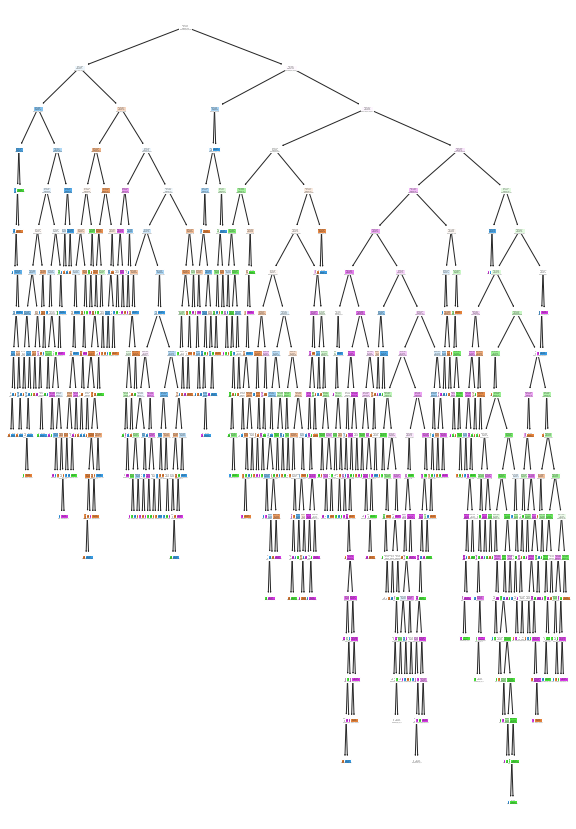

In [64]:
plt.figure(figsize = (10,15))
tree.plot_tree(clf, filled = True)

In [90]:
# Plotting tree with different random states
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=2,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0,1,2,3,4, 5]);

interactive(children=(Dropdown(description='random_state', options=(0, 1, 2, 3, 4, 5), value=0), Output()), _d…

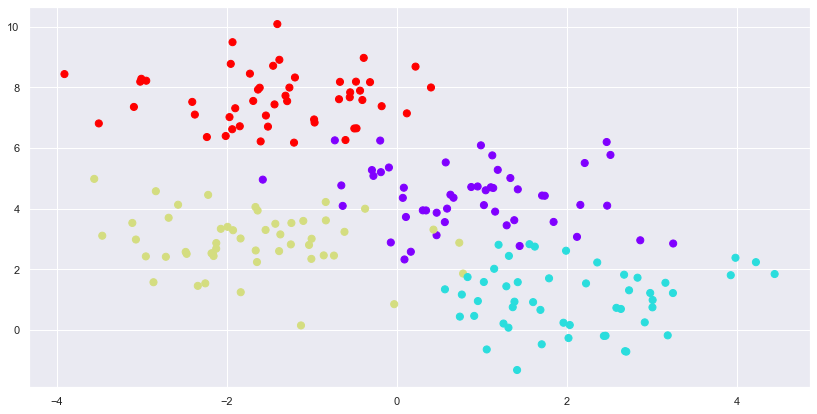

In [91]:
# Plotting tree as blobs
X, y = make_blobs(n_samples= 200, centers=4,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [92]:
# Plotting interactive tree
plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', options=(1, 5), value=1), Output()), _dom_classes=('widget…

/Users/amad/fig_code/figures.py:72: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')
/Users/amad/fig_code/figures.py:72: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')


<Figure size 1008x504 with 0 Axes>

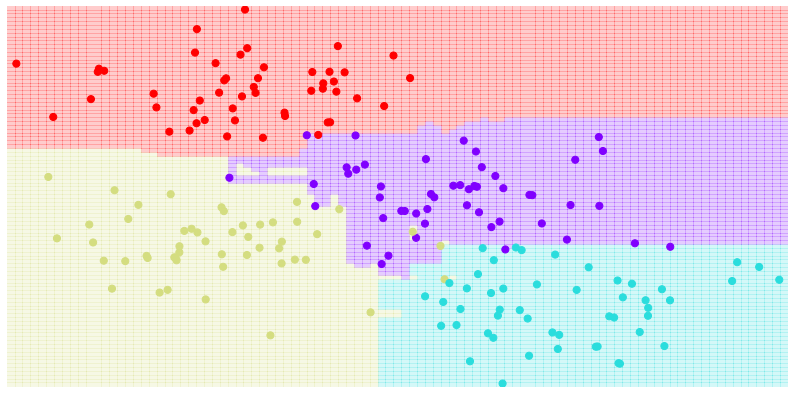

<Figure size 1008x504 with 0 Axes>

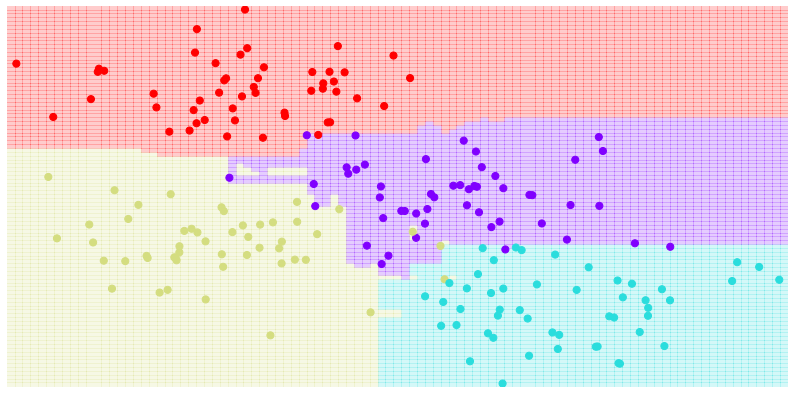

In [93]:
# Plotting the tree
plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

In [81]:
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[46 17 29 19]
 [13 58 12 19]
 [21  9 56  9]
 [11 27  9 45]]


# Random Forest

In [82]:
# Fitting random forest model
clf = RandomForestClassifier(n_estimators=50, random_state=50)
clf.fit(X_train, y_train)

<ipython-input-82-8d09e3029c67>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=50)

In [84]:
# Predicting test dataset

predicted = clf.predict(X_test)
# Probability of prediction
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.605

In [85]:
# Classification matrix
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.68      0.50      0.58       111
           1       0.50      0.55      0.52       102
           2       0.61      0.74      0.67        95
           3       0.67      0.65      0.66        92

    accuracy                           0.60       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.61      0.60      0.60       400



In [86]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[56 19 27  9]
 [12 56 16 18]
 [12 10 70  3]
 [ 2 28  2 60]]


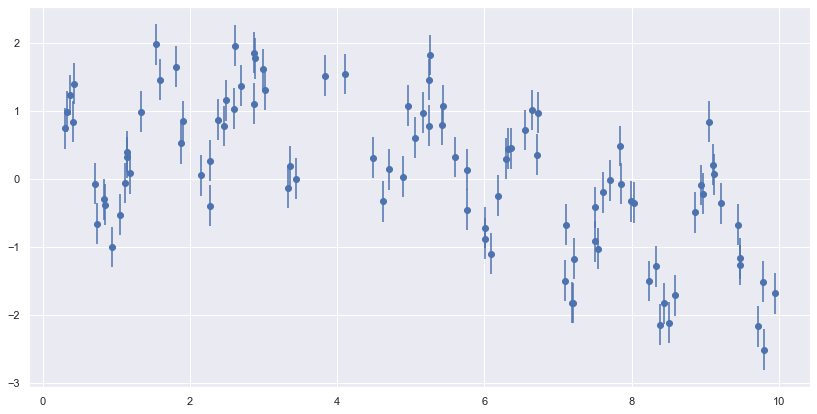

In [87]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


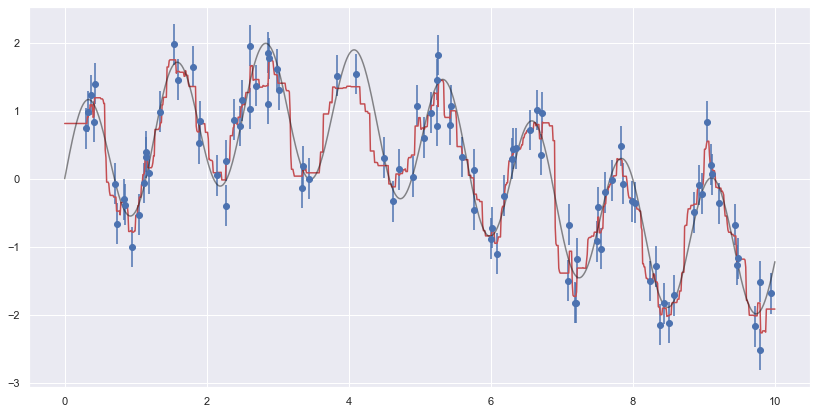

In [88]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);